# Manipulation des jeux de données

In [2]:
#Import
import pandas as pd
import numpy as np
import operator
#Train et test
from sklearn.model_selection import train_test_split
######
from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

In [3]:
data_B =pd.read_csv('/home/sid2020-7/Bureau/DATA1/Donnees_v1.csv')
data_B

,Unnamed: 0,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,...,SECTEUR_GESTION_SECTEUR MONTPELLIER CENTRE UNIV,SECTEUR_GESTION_SECTEUR MONTPELLIER PIC ST LOUP,SECTEUR_GESTION_SECTEUR NARBONNE,SECTEUR_GESTION_SECTEUR NIMES,SECTEUR_GESTION_SECTEUR NORD,SECTEUR_GESTION_SECTEUR OUEST,SECTEUR_GESTION_SECTEUR SUD,SECTEUR_GESTION_SECTEUR THAU LITTORAL,SECTEUR_GESTION_SECTEUR VALLEE DU RHONE,SECTEUR_GESTION_SVCES SIEGES BR RESEAUX
0,0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
3,3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
4,4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849407,849407,835mBEOByTBamgQVgQg771KDA==,1,1,0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
849408,849408,835rWBxack6OQY9AQFqyqJd5g==,1,1,0,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
849409,849409,835F1MFghZuFjdn+sBHNuQaBw==,1,1,0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
849410,849410,835HAiChYU6Al85Ed4c5I/urw==,1,1,0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
#Import

import operator
#Train et test
from sklearn.model_selection import train_test_split
from collections import OrderedDict
from functools import partial
from time import time
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets

data_B =pd.read_csv('/home/sid2020-7/Bureau/DATA1/Donnees_v1.csv')
data_B['TAUX_LECTURE_MS_6M']=data_B['TAUX_LECTURE_MS_6M'].str.rstrip('%').astype('float') / 100.0
data_B['TAUX_LECTURE_PAP_6M']=data_B['TAUX_LECTURE_PAP_6M'].str.rstrip('%').astype('float') / 100.0
data_B['TAUX_LECTURE_EMAIL_6M']=data_B['TAUX_LECTURE_EMAIL_6M'].str.rstrip('%').astype('float') / 100.0
ech_test = data_B.sample(int(len(data_B) * 0.001), random_state=42)
ech_train = data_B.drop(ech_test.index)
L=list(data_B.columns)
L.remove('Unnamed: 0')
L.remove('ID')
L.remove('TOP_FRAUDE')
ech_test.drop("Unnamed: 0",axis=1)

features=ech_test[L].astype(float).values
target=ech_test['TOP_FRAUDE'].astype(float).values
features.tolist()
# from __future__ import print_function

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=250)
tsne_results = tsne.fit_transform(features)
print('t-SNE Finis! temps: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 849 samples in 0.043s...
[t-SNE] Computed neighbors for 849 samples in 0.584s...
[t-SNE] Computed conditional probabilities for sample 849 / 849
[t-SNE] Mean sigma: 70.378566
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.401138
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000
t-SNE Finis! temps: 3.1960651874542236 seconds


In [16]:
tsne_results[:,1]

array([ 0.8093114,  0.0988887,  2.6499424, ...,  1.1647961,  2.8716645,
       -0.727858 ], dtype=float32)

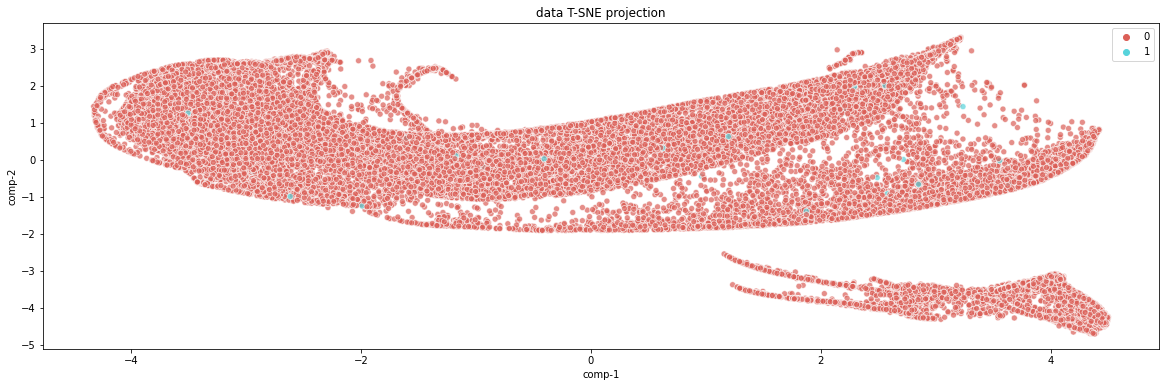

In [32]:
df = pd.DataFrame()
df["target"]  = ech_test['TOP_FRAUDE']
df["comp-1"] = tsne_results[:,0]
df["comp-2"] = tsne_results[:,1]
plt.rcParams["figure.figsize"] = (20,6)
ax = sns.scatterplot(alpha=0.7,x="comp-1", y="comp-2", hue=df.target.tolist(),
                palette=sns.color_palette("hls", 2)
                ,data=df).set(title="data T-SNE projection")
plt.show()

In [3]:
tsne_results

NameError: name 'tsne_results' is not defined

## Locally  Linear  Embedding

In [33]:
LLE = partial(manifold.LocallyLinearEmbedding,n_neighbors=n_neighbors,n_components=n_components,eigen_solver="auto",)

In [1]:
time_start = time.time()
MDS = LLE(method="hessian")
MDS_results = MDS.fit_transform(features)
print('MDS Finis! temps: {} seconds'.format(time.time()-time_start))

NameError: name 'time' is not defined

In [ ]:
df = pd.DataFrame()
df["target"]  = ech_test['TOP_FRAUDE']
df["comp-1"] = tsne_results[:,0]
df["comp-2"] = tsne_results[:,1]
plt.rcParams["figure.figsize"] = (20,6)
ax = sns.scatterplot(alpha=0.7,x="comp-1", y="comp-2", hue=df.target.tolist(),
                palette=sns.color_palette("hls", 2)
                ,data=df).set(title="data T-SNE projection")
plt.show()

In [10]:

fig = plt.figure(figsize=(15, 8))
fig.suptitle(
    "Manifold Learning with %i points, %i neighbors" % (1000, n_neighbors), fontsize=14
)
LLE = partial(
    manifold.LocallyLinearEmbedding,
    n_neighbors=n_neighbors,
    n_components=n_components,
    eigen_solver="auto",
)s
# # Add 3d scatter plot
# ax = fig.add_subplot(251, projection="3d")
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
# ax.view_init(4, -72)

# Set-up manifold methods

methods = OrderedDict()
methods["LLE"] = LLE(method="standard")
methods["LTSA"] = LLE(method="ltsa")
methods["Hessian LLE"] = LLE(method="hessian")
methods["Modified LLE"] = LLE(method="modified")
methods["Isomap"] = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
methods["MDS"] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods["SE"] = manifold.SpectralEmbedding(
    n_components=n_components, n_neighbors=n_neighbors
)
# methods["t-SNE"] = manifold.TSNE(n_components=n_components, init="pca", random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

plt.show()

KeyboardInterrupt: 

<Figure size 1080x576 with 0 Axes>

In [4]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [7]:
df2=missing_values_table(data_B)
df3=df2[df2['% of Total Values']>5]

Your selected dataframe has 288 columns.
There are 282 columns that have missing values.


In [41]:
df3

,Missing Values,% of Total Values
mt_pret_realise,823357,96.9
top_real_pret_3M,823357,96.9
nb_pret_realise,823357,96.9
nb_mois_dern_realisation_pret,823357,96.9
top_real_pret_6M,823357,96.9
top_GERANT,718363,84.6
top_DIRECTEUR_GENERAL,718363,84.6
top_PRESIDENT,718363,84.6
top_PDG,718363,84.6
top_pro,718363,84.6


In [8]:
liste_col_nan_moins4=['nb_pret_realise','nb_mois_dern_realisation_pret',
                      'nb_mois_dern_realisation_pret','nb_mois_dern_realisation_pret']

for k in df3.index:
    if len(data_B[k].unique())<4:
        liste_col_nan_moins4.append(k)
liste_col_nan_moins4
dic_list={}
for e in liste_col_nan_moins4:
    if e!='sexe_2':
        dic_list[e]=0
df_replace_nan = data_B.copy()
df_replace_nan.fillna(dic_list)

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,Date_debut_fraude,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil,localisation
0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,01FEB2021,fìPÅæ,SECTEUR CENTRE,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,NaN,NaN,NaN,NaN,NaN,NaN,NF,0.0,Très peu actifs,toulouse
1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,01MAR2021,aLÄsb,SECTEUR EST,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,60.0,42.0,0.0,0.0,15.0,0.0,FI,1.0,Hyper actifs,toulouse
2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,01MAR2021,Z0ÎuP,SECTEUR SUD,MAIL_OPTOUT,TEL_OPTIN,POR_OPTIN,...,7.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Ma Banque,toulouse
3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,01MAR2021,ëmzXM,SECTEUR NORD,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,6.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Hyper actifs,toulouse
4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,01SEP2020,å3èJ3,SECTEUR CENTRE,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,41.0,13.0,0.0,0.0,9.0,0.0,FI,1.0,Hyper actifs,toulouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849341,835mBEOByTBamgQVgQg771KDA==,1,1,0,NaN,q9åmS,SECTEUR HAUT LGDC COEUR HERAULT,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,1.0,5.0,0.0,0.0,0.0,0.0,NF,1.0,Full digital,languedoc
849342,835rWBxack6OQY9AQFqyqJd5g==,1,1,0,NaN,6lçxa,SECTEUR MAUGUIO MEDITERRANEE,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,68.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Bienvenue,languedoc
849343,835F1MFghZuFjdn+sBHNuQaBw==,1,1,0,NaN,0késÎ,SECTEUR ALES CVN,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,1.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Bienvenue,languedoc
849344,835HAiChYU6Al85Ed4c5I/urw==,1,1,0,NaN,f3QRg,SECTEUR HAUT LGDC COEUR HERAULT,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,4.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Bienvenue,languedoc


In [45]:
for k in df3.index:
    if len(data_B[k].unique())<4:
        print(k,data_B[k].unique())

top_real_pret_3M [nan  0.  1.]
top_real_pret_6M [nan  1.  0.]
top_GERANT [nan  0.  1.]
top_DIRECTEUR_GENERAL [nan  0.  1.]
top_PRESIDENT [nan  1.  0.]
top_PDG [nan  0.  1.]
top_pro [nan  1.]
top_ADMINISTRATEUR [nan  0.  1.]
top_TRESORIER [nan  0.  1.]
top_COMMANDITAIRE [nan  0.  1.]
top_debiteur_M [nan  1.  0.]
top_ferm_prod_6M [nan  1.]
sexe_2 [nan 'F' 'M']
societaire_M [nan  1.  0.]
nouveau_societaire_M [nan  0.  1.]
perte_societaire_M [nan  0.  1.]


In [44]:
data_B['top_real_pret_3M'].unique()

array([nan,  0.,  1.])

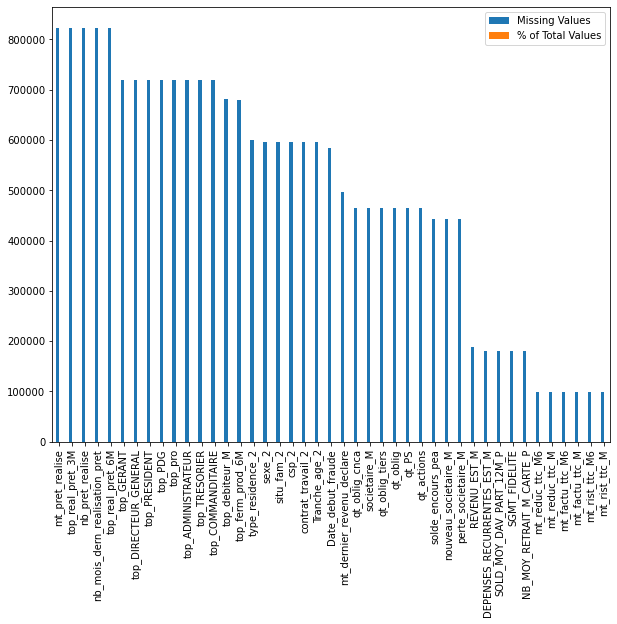

In [8]:
import numpy as np
df3.plot.bar(figsize=(10,8))

In [52]:
df_jeu1_toulouse.describe()

,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,REFUS_SEA,...,top_produit_Credit,top_produit_Epargne,top_produit_Services,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Flag_bq_principale
count,265293.000000,265293.000000,265293.000000,264912.000000,264912.000000,264912.000000,264912.000000,264912.000000,264912.000000,264912.000000,...,263633.000000,263633.000000,263633.000000,233598.000000,233598.000000,233598.000000,233598.000000,233598.000000,233598.000000,264088.000000
mean,0.001538,0.000765,0.000939,0.484334,0.701425,0.385079,0.026782,0.865016,0.395962,0.000087,...,0.589850,0.839732,0.954971,19.110420,18.167197,0.019589,0.021653,0.763671,1.016717,0.822836
std,0.039186,0.027652,0.030622,0.499755,0.476862,0.486615,0.161447,0.341708,0.489057,0.009317,...,0.491862,0.366855,0.207367,59.097186,52.647669,2.296920,2.543029,8.191815,9.752614,0.381809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1200.000000,-1700.000000,-320.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,13.000000,12.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,6600.000000,8600.000000,600.000000,920.000000,750.000000,750.000000,1.000000


In [56]:

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# to_drop = [column for column in upper.columns if any(upper[column] < 0.1)]
# corr_matrix.drop(to_drop, axis=1, inplace=True)
# corr_matrix

In [52]:
df.drop(to_drop, axis=1, inplace=True)
df

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,Date_debut_fraude,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,sexe_1,sexe_2,Tranche_age_moyen,situ_globale,SGMT_FIDELITE,top_pro,top_ferm_prod_6M,Fidelite_calcule,profil,localisation
0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,01FEB2021,fìPÅæ,SECTEUR CENTRE,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,M,NaN,36-45,M seul,NaN,NaN,NaN,NF,Très peu actifs,toulouse
1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,01MAR2021,aLÄsb,SECTEUR EST,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,M,F,26-35,Famille,BQ P+,NaN,1.0,FI,Hyper actifs,toulouse
2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,01MAR2021,Z0ÎuP,SECTEUR SUD,MAIL_OPTOUT,TEL_OPTIN,POR_OPTIN,...,M,NaN,36-45,M seul,BQ P+,NaN,NaN,FI,Digital Ma Banque,toulouse
3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,01MAR2021,ëmzXM,SECTEUR NORD,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,F,M,36-45,Famille,BQ P+,NaN,NaN,FI,Hyper actifs,toulouse
4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,01SEP2020,å3èJ3,SECTEUR CENTRE,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,F,M,46-55,Famille,BQ P+,NaN,1.0,FI,Hyper actifs,toulouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849341,835mBEOByTBamgQVgQg771KDA==,1,1,0,NaN,q9åmS,SECTEUR HAUT LGDC COEUR HERAULT,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,M,NaN,56-65,M seul,BQ P+,NaN,1.0,NF,Full digital,languedoc
849342,835rWBxack6OQY9AQFqyqJd5g==,1,1,0,NaN,6lçxa,SECTEUR MAUGUIO MEDITERRANEE,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,M,F,66-75,Couple,BQ SD,1.0,1.0,NF,Bienvenue,languedoc
849343,835F1MFghZuFjdn+sBHNuQaBw==,1,1,0,NaN,0késÎ,SECTEUR ALES CVN,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,F,NaN,46-55,F seule,NaN,NaN,1.0,NF,Bienvenue,languedoc
849344,835HAiChYU6Al85Ed4c5I/urw==,1,1,0,NaN,f3QRg,SECTEUR HAUT LGDC COEUR HERAULT,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,M,NaN,18-25,M seul,INA,NaN,1.0,NF,Bienvenue,languedoc


In [46]:
df.columns

Index(['ID', 'TOP_FRAUDE', 'TOP_FRAUDE_CARTE', 'Date_debut_fraude',
       'cp_ou_pays', 'SECTEUR_GESTION', 'INDICMAIL', 'INDICTEL', 'INDICPOR',
       'INDICSMS', 'INDICMAILING', 'DUREE_CNX_WEB_TOT_6M',
       'DUREE_CNX_MOY_WEB_6M', 'TAUX_LECTURE_PAP_6M', 'TAUX_LECTURE_EMAIL_6M',
       'TAUX_LECTURE_MS_6M', 'seg_nature_potentiel', 'type_residence_1',
       'type_residence_2', 'situ_fam_1', 'situ_fam_2', 'contrat_travail_1',
       'contrat_travail_2', 'Tranche_age_1', 'Tranche_age_2', 'sexe_1',
       'sexe_2', 'Tranche_age_moyen', 'situ_globale', 'SGMT_FIDELITE',
       'top_pro', 'top_ferm_prod_6M', 'Fidelite_calcule', 'profil',
       'localisation'],
      dtype='object')

In [11]:
import numpy as np
df=df_replace_nan.copy()
corr_matrix = df.corr().abs()
cor=corr_matrix.copy()
# df.drop([col for col, val in df.sum().iteritems() if val < 10], axis=1, inplace=True)
cor=cor.sum().iteritems()
cor['sum'] = cor[list(cor.columns)].sum(axis=1)

,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,REFUS_SEA,...,top_produit_Epargne,top_produit_Services,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Flag_bq_principale,sum
TOP_FRAUDE,1.000000,0.723622,0.785086,0.021996,0.064106,0.006871,0.008363,0.016569,0.011360,0.000517,...,0.012687,0.008799,0.006398,0.004948,0.000262,0.000354,0.000645,0.000102,0.018092,4.735736
TOP_FRAUDE_CARTE,0.723622,1.000000,0.247025,0.016394,0.041657,0.003663,0.005229,0.011991,0.008795,0.000215,...,0.008440,0.006205,0.005294,0.001737,0.000196,0.000233,0.000528,0.000168,0.013648,3.632015
TOP_FRAUDE_VIREMENT,0.785086,0.247025,1.000000,0.017777,0.057458,0.007353,0.008069,0.013185,0.008115,0.000647,...,0.011459,0.007247,0.006179,0.004932,0.000202,0.000262,0.000221,0.000520,0.014334,3.862153
TOP_E_RELEVE,0.021996,0.016394,0.017777,1.000000,0.587152,0.135949,0.037545,0.293968,0.266632,0.034474,...,0.171305,0.191835,0.034718,0.061749,0.000022,0.000558,0.030084,0.027899,0.301158,28.860967
MESSAGERIE_WEB_ACTIVE,0.064106,0.041657,0.057458,0.587152,1.000000,0.108034,0.045665,0.382923,0.217383,0.029165,...,0.269165,0.308236,0.046841,0.065511,0.000417,0.001798,0.034019,0.032645,0.444296,34.017724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt_reduc_ttc_M,0.000262,0.000196,0.000202,0.000022,0.000417,0.000743,0.001931,0.000207,0.001596,0.002699,...,0.002493,0.000457,0.084427,0.016865,1.000000,0.001198,0.000148,0.020866,0.000339,1.609709
mt_reduc_ttc_M6,0.000354,0.000233,0.000262,0.000558,0.001798,0.001768,0.005751,0.001921,0.002566,0.000502,...,0.001792,0.000576,0.007655,0.074620,0.001198,1.000000,0.009674,0.002144,0.000011,1.832927
mt_rist_ttc_M,0.000645,0.000528,0.000221,0.030084,0.034019,0.024087,0.005590,0.023969,0.028418,0.000973,...,0.011683,0.007149,0.175369,0.087571,0.000148,0.009674,1.000000,0.129771,0.033507,8.428525
mt_rist_ttc_M6,0.000102,0.000168,0.000520,0.027899,0.032645,0.021490,0.008201,0.026048,0.031133,0.002528,...,0.013883,0.005751,0.055855,0.259675,0.020866,0.002144,0.129771,1.000000,0.034684,7.309088


In [13]:
cor=cor.sort_values(by=['sum'],ascending=False)
cor

,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,REFUS_SEA,...,top_produit_Epargne,top_produit_Services,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Flag_bq_principale,sum
note_mire,0.022267,0.017290,0.017686,0.380588,0.488861,0.011532,0.056232,0.295990,0.214938,0.000192,...,0.532587,0.333352,0.134756,0.179938,0.000349,0.002087,0.056321,0.060144,0.748492,52.873148
note_FOpDebitrice,0.018340,0.015071,0.013463,0.398499,0.514889,0.012583,0.028699,0.308858,0.192382,0.005325,...,0.417423,0.368461,0.103648,0.146519,0.000960,0.000577,0.049859,0.050147,0.838322,50.642897
nb_operation_debit_depot_M,0.017541,0.015349,0.011708,0.347863,0.381307,0.053746,0.026310,0.245915,0.204221,0.014117,...,0.307799,0.218761,0.134689,0.173266,0.000298,0.001680,0.049582,0.055007,0.565450,49.227494
nb_operation_debit_depot_M6,0.015407,0.013063,0.010933,0.337397,0.368278,0.043111,0.028260,0.240999,0.198890,0.012081,...,0.300207,0.215266,0.121403,0.178568,0.000361,0.001742,0.052977,0.054061,0.563489,48.284094
nb_produit_Services,0.020807,0.017044,0.015282,0.372260,0.416994,0.030336,0.045320,0.250077,0.241311,0.023196,...,0.350623,0.354184,0.153170,0.198414,0.000057,0.003440,0.063819,0.067137,0.550795,47.346730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt_reduc_ttc_M6,0.000354,0.000233,0.000262,0.000558,0.001798,0.001768,0.005751,0.001921,0.002566,0.000502,...,0.001792,0.000576,0.007655,0.074620,0.001198,1.000000,0.009674,0.002144,0.000011,1.832927
top_COMMANDITAIRE,0.000730,0.000518,0.000600,0.001503,0.005219,0.004798,0.003675,0.003150,0.003946,0.006422,...,0.002945,0.002416,0.000679,0.009194,0.000102,0.000206,0.001302,0.002719,0.000614,1.650963
mt_reduc_ttc_M,0.000262,0.000196,0.000202,0.000022,0.000417,0.000743,0.001931,0.000207,0.001596,0.002699,...,0.002493,0.000457,0.084427,0.016865,1.000000,0.001198,0.000148,0.020866,0.000339,1.609709
top_pro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
## by sum 

df=df_replace_nan.copy()
corr_matrix = df.corr().abs()
cor=corr_matrix.copy()
cor['sum'] = cor[list(cor.columns)].sum(axis=1)
cor=cor.sort_values(by=['sum'],ascending=False)
## choix de 15 variables les plus corrélée
cor_15=cor[:15]## a changer 
col=cor_15.index
cor_15=cor_15[col]

## plot matrice de corrélation
plt.subplots(figsize=(20,15))
sns.heatmap(cor_15, annot = True)
plt.show()

AttributeError: 'zip' object has no attribute 'columns'

In [48]:
# by mean
df=data_B.copy()
corr_matrix = df.corr().abs()
cor=corr_matrix.copy()

cor=cor.sum().iteritems()
cor['mean'] = cor[list(cor.columns)].mean(axis=1)
cor=cor.sort_values(by=['mean'],ascending=False)
## choix de 15 variables les plus corrélée
cor_15=cor[:15]## a changer 
col=cor_15.index
cor_15=cor_15[col]
## plot matrice de corrélation
plt.subplots(figsize=(20,15))
sns.heatmap(cor_15, annot = True)
plt.show()

AttributeError: 'zip' object has no attribute 'columns'

### Une colonne de différence entre le jeu Toulouse et Languedoc
* La colonne Date_Debut_Fraude est présente à Toulouse mais pas au Languedoc

In [9]:
df_jeu1_toulouse["Date_debut_fraude"]

0         01FEB2021
1         01MAR2021
2         01MAR2021
3         01MAR2021
4         01SEP2020
            ...    
265288    01JUL2020
265289    01NOV2020
265290    01SEP2021
265291    01JUL2020
265292    01APR2021
Name: Date_debut_fraude, Length: 265293, dtype: object

## Dimensions

In [10]:
#Dimension Toulouse
print("Dimension Jeu de données 1 : Toulouse")
print("Nombre de colonnes/variables : %i \nNombre de lignes : %i" \
      %(df_jeu1_toulouse.shape[1], df_jeu1_toulouse.shape[0])) 
print("\n")

#Dimension Languedoc
print("Dimension Jeu de données 1 : Languedoc")
print("Nombre de colonnes/variables : %i \nNombre de lignes : %i" \
      %(df_jeu1_languedoc.shape[1], df_jeu1_languedoc.shape[0])) 

Dimension Jeu de données 1 : Toulouse
Nombre de colonnes/variables : 287 
Nombre de lignes : 265293


Dimension Jeu de données 1 : Languedoc
Nombre de colonnes/variables : 286 
Nombre de lignes : 584053


## Types des données

In [11]:
# Informations sur les types de variables : Toulouse
print("Toulouse")
print(df_jeu1_toulouse.info()) 
print("\n")

# Informations sur les types de variables : Languedoc
print("Languedoc")
print(df_jeu1_languedoc.info())

Toulouse
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265293 entries, 0 to 265292
Columns: 287 entries, ID to profil
dtypes: float64(254), int64(3), object(30)
memory usage: 580.9+ MB
None


Languedoc
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584053 entries, 0 to 584052
Columns: 286 entries, ID to profil
dtypes: float64(254), int64(3), object(29)
memory usage: 1.2+ GB
None


## Valeurs nulles

In [19]:
for col in df_jeu1_toulouse:
    print("Colonne :",col,", % données manquantes :",round(df_jeu1_toulouse[col].isnull().sum() / df_jeu1_toulouse.shape[0]*100,2))

Colonne : ID , % données manquantes : 0.0
Colonne : TOP_FRAUDE , % données manquantes : 0.0
Colonne : TOP_FRAUDE_CARTE , % données manquantes : 0.0
Colonne : TOP_FRAUDE_VIREMENT , % données manquantes : 0.0
Colonne : Date_debut_fraude , % données manquantes : 0.0
Colonne : cp_ou_pays , % données manquantes : 0.0
Colonne : SECTEUR_GESTION , % données manquantes : 0.0
Colonne : INDICMAIL , % données manquantes : 0.14
Colonne : INDICTEL , % données manquantes : 0.14
Colonne : INDICPOR , % données manquantes : 0.14
Colonne : INDICSMS , % données manquantes : 0.14
Colonne : INDICMAILING , % données manquantes : 0.14
Colonne : TOP_E_RELEVE , % données manquantes : 0.14
Colonne : MESSAGERIE_WEB_ACTIVE , % données manquantes : 0.14
Colonne : FIAB_TEL_DOMICILE , % données manquantes : 0.14
Colonne : FIAB_TEL_TRAVAIL , % données manquantes : 0.14
Colonne : FIAB_TEL_PORTABLE , % données manquantes : 0.14
Colonne : FIAB_EMAIL , % données manquantes : 0.14
Colonne : REFUS_SEA , % données manquantes

Colonne : nb_operation_credit_depot_M , % données manquantes : 0.6
Colonne : nb_operation_credit_depot_M6 , % données manquantes : 0.6
Colonne : nb_operation_credit_ep_a_vue_M , % données manquantes : 0.6
Colonne : nb_operation_credit_ep_a_vue_M6 , % données manquantes : 0.6
Colonne : nb_operation_debit_depot_M , % données manquantes : 0.6
Colonne : nb_operation_debit_depot_M6 , % données manquantes : 0.6
Colonne : nb_operation_debit_ep_a_vue_M , % données manquantes : 0.6
Colonne : nb_operation_debit_ep_a_vue_M6 , % données manquantes : 0.6
Colonne : nb_ouv_prod_6M , % données manquantes : 0.6
Colonne : nb_paiement_carte_M , % données manquantes : 0.6
Colonne : nb_paiement_carte_M6 , % données manquantes : 0.6
Colonne : nb_paiement_chq_M , % données manquantes : 0.6
Colonne : nb_paiement_chq_M6 , % données manquantes : 0.6
Colonne : nb_pmts_carte_etr_M , % données manquantes : 0.6
Colonne : nb_pmts_carte_etr_M6 , % données manquantes : 0.6
Colonne : nb_prlv_impaye , % données manquant

In [18]:
for col in df_jeu1_languedoc:
    print("Colonne :", col, ", % données manquantes :", round(df_jeu1_languedoc[col].isnull().sum() / df_jeu1_languedoc.shape[0]*100,2))

Colonne : ID , % données manquantes : 0.0
Colonne : TOP_FRAUDE , % données manquantes : 0.0
Colonne : TOP_FRAUDE_CARTE , % données manquantes : 0.0
Colonne : TOP_FRAUDE_VIREMENT , % données manquantes : 0.0
Colonne : cp_ou_pays , % données manquantes : 0.0
Colonne : SECTEUR_GESTION , % données manquantes : 0.0
Colonne : INDICMAIL , % données manquantes : 0.11
Colonne : INDICTEL , % données manquantes : 0.11
Colonne : INDICPOR , % données manquantes : 0.11
Colonne : INDICSMS , % données manquantes : 0.11
Colonne : INDICMAILING , % données manquantes : 0.11
Colonne : TOP_E_RELEVE , % données manquantes : 0.11
Colonne : MESSAGERIE_WEB_ACTIVE , % données manquantes : 0.11
Colonne : FIAB_TEL_DOMICILE , % données manquantes : 0.11
Colonne : FIAB_TEL_TRAVAIL , % données manquantes : 0.11
Colonne : FIAB_TEL_PORTABLE , % données manquantes : 0.11
Colonne : FIAB_EMAIL , % données manquantes : 0.11
Colonne : REFUS_SEA , % données manquantes : 0.11
Colonne : NBJ_CNT_AGENCE_DEPOT_6M , % données man

Colonne : ENCOURS_REVOLVING , % données manquantes : 0.02
Colonne : top_REVOLVING , % données manquantes : 0.02
Colonne : ENCOURS_CONSO , % données manquantes : 0.02
Colonne : top_credit_CONSO , % données manquantes : 0.02
Colonne : ENCOURS_HABITAT , % données manquantes : 0.02
Colonne : top_credit_HABITAT , % données manquantes : 0.02
Colonne : top_produit_collecte , % données manquantes : 0.02
Colonne : top_produit_monetaire_dispo , % données manquantes : 0.02
Colonne : top_produit_monetaire_bloque , % données manquantes : 0.02
Colonne : top_produit_emprunts , % données manquantes : 0.02
Colonne : top_produit_epargne_logement , % données manquantes : 0.02
Colonne : REVENU_EST_M , % données manquantes : 22.1
Colonne : DEPENSES_RECURRENTES_EST_M , % données manquantes : 21.31
Colonne : SOLD_MOY_DAV_PART_12M_P , % données manquantes : 21.26
Colonne : NB_MOY_RETRAIT_M_CARTE_P , % données manquantes : 21.26
Colonne : SGMT_FIDELITE , % données manquantes : 21.26
Colonne : mt_dernier_revenu

Colonne : profil , % données manquantes : 0.02


## Description jeu de données

### Description Toulouse

In [20]:
df_jeu1_toulouse.describe(include='all')

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,Date_debut_fraude,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,top_produit_Services,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil
count,265293,265293.000000,265293.000000,265293.000000,265293,265293,265291,264912,264912,264912,...,263633.000000,233598.000000,233598.000000,233598.000000,233598.000000,233598.000000,233598.000000,264088,264088.000000,265241
unique,265291,NaN,NaN,NaN,261,3699,10,3,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,13
top,831IElJDmk756EDL5icu3ubuQ==,NaN,NaN,NaN,01FEB2021,å3èJ3,SECTEUR EST,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FI,NaN,Digital Ma Banque
freq,2,NaN,NaN,NaN,17894,12618,53983,142132,135685,212938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187141,NaN,56818
mean,NaN,0.001538,0.000765,0.000939,NaN,NaN,NaN,NaN,NaN,NaN,...,0.954971,19.110420,18.167197,0.019589,0.021653,0.763671,1.016717,NaN,0.822836,NaN
std,NaN,0.039186,0.027652,0.030622,NaN,NaN,NaN,NaN,NaN,NaN,...,0.207367,59.097186,52.647669,2.296920,2.543029,8.191815,9.752614,NaN,0.381809,NaN
min,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,-1200.000000,-1700.000000,-320.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN
50%,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN
75%,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,13.000000,12.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN


### Description Languedoc

In [21]:
df_jeu1_languedoc.describe(include='all')

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,INDICSMS,...,top_produit_Services,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil
count,584053,584053.000000,584053.000000,584053.000000,584053,584043,583407,583407,583407,583407,...,581282.000000,515840.000000,515840.000000,515840.000000,515840.000000,515840.000000,515840.000000,582200,582200.000000,583955
unique,584022,NaN,NaN,NaN,5156,24,3,3,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,13
top,835RU+nd2lXjJ2uVsyxExR44g==,NaN,NaN,NaN,kÇp82,SECTEUR ALES CVN,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,SMS_OPTIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FI,NaN,Digital Ma Banque
freq,2,NaN,NaN,NaN,16568,49842,232449,342362,428771,291718,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210113,NaN,105998
mean,NaN,0.002072,0.001104,0.001282,NaN,NaN,NaN,NaN,NaN,NaN,...,0.949766,20.645375,18.412006,0.017480,0.011197,0.809199,1.022835,NaN,0.672491,NaN
std,NaN,0.045469,0.033213,0.035788,NaN,NaN,NaN,NaN,NaN,NaN,...,0.218427,71.798351,48.999370,3.345264,1.141311,7.952496,9.184804,NaN,0.469305,NaN
min,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,-1800.000000,-730.000000,-1.000000,-1.000000,0.000000,-23.000000,NaN,0.000000,NaN
25%,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
50%,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,7.000000,6.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN
75%,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,16.000000,14.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN


## Affichage distinct values

### Afficher distinct values : Toulouse

In [22]:
for col in df_jeu1_toulouse:
    print(df_jeu1_toulouse[col].unique())

['8312v5IodTRgOR8/FWWjGEwsg==' '831pI3Dnm1zz6NG0iCJTfcilQ=='
 '831b9S86qzWBJCaqgYOVPwWMQ==' ... '831ZMCaimlzSFHKxaKJEDPefQ=='
 '831FiYDYlJm0Y/Y+b1+3gQasw==' '831rkot6fG2Ea5FWcuAnNuJew==']
[0 1]
[0 1]
[0 1]
['01FEB2021' '01MAR2021' '01SEP2020' '01JUL2020' '01NOV2020' '01JUN2021'
 '01AUG2021' '01APR2021' '01SEP2021' '01DEC2020' '01MAY2021' '01JAN2021'
 '01AUG2020' '01JUL2021' '01OCT2020' '06JUL2021' '23FEB2021' '13FEB2021'
 '29AUG2021' '29OCT2020' '30DEC2020' '02APR2021' '21JUL2020' '21OCT2020'
 '19MAY2021' '17SEP2021' '21SEP2020' '17SEP2020' '08APR2021' '31MAR2021'
 '26AUG2020' '27MAR2021' '27SEP2020' '25FEB2021' '15JAN2021' '29AUG2020'
 '23JUN2021' '15OCT2020' '09NOV2020' '30SEP2020' '30NOV2020' '28DEC2020'
 '05NOV2020' '12JUL2021' '08DEC2020' '06APR2021' '11MAY2021' '03JUL2020'
 '28JUN2021' '25AUG2020' '09JAN2021' '13AUG2020' '23SEP2020' '26JUN2021'
 '07APR2021' '20OCT2020' '04AUG2020' '23AUG2021' '17MAR2021' '24MAR2021'
 '03MAR2021' '24NOV2020' '28JAN2021' '18JUN2021' '26AUG2021' '04

[  0.   1.   3.   5.  25.  36. 168.  63.   2.  82.   4. 184. 117. 131.
 178.  nan 136.  23. 128. 148. 106.  69. 174. 180. 158. 118.  65.   7.
  84.  15. 153. 187.  86.   6. 191.   9. 177. 167.  94. 171. 175. 126.
  98. 129.  49.  54. 134. 105. 176.  85.  28. 132.  64.  35.  21.  44.
 113. 152.  47.  93. 150. 155. 159. 127.  26. 123.  83.  40. 172. 185.
  10. 138. 101.  43.  31.  38. 160. 157.   8.  80. 179. 163.  12.  48.
 156. 151.  99. 164. 121. 161. 103. 100. 107.  45.  19. 119. 116.  50.
  30. 154. 169. 170. 181.  53. 144. 143. 166. 165. 147.  56.  88. 102.
 183.  87.  32. 120.  11.  17.  52. 137.  39.  58. 190.  78. 122. 139.
 104.  61. 140.  89.  62. 111.  75.  97. 114. 145. 124. 186.  60. 149.
  72.  92. 135. 188.  16. 115. 125.  90.  91. 182.  34. 133.  27. 173.
 112. 193.  73.  51. 110.  68. 146.  81.  96.  79.  33.  41.  14.  22.
 130.  24.  42.  29.  46. 109. 108. 142.  18.  13.  74.  20. 189.  76.
  37. 141.  71. 162.  77.  95.  55.  70.  57.  67.  66. 192.  59. 197.
 194. 

[0.000e+00 5.600e+03 9.300e+03 8.900e+03 8.800e+03 3.800e+03 5.400e+03
 6.600e+03 8.700e+03 1.100e+03 2.200e+03 8.400e+02 3.000e+03 1.200e+03
 2.600e+03 5.000e+03 2.800e+03 4.300e+03 1.600e+03 6.100e+03 1.800e+02
 6.300e+03 9.600e+03 1.770e+04 2.300e+03 1.240e+04 1.130e+04 1.220e+04
 6.000e+03 1.400e+03 1.750e+04 6.500e+03 7.400e+03 3.400e+03 5.100e+03
 3.900e+03 2.700e+03 4.100e+03 4.600e+03 8.900e+01 1.820e+04 9.900e+02
 3.300e+03 1.900e+03 9.800e+03 1.700e+03 2.800e+02 1.180e+04 2.600e+02
 3.600e+03 5.500e+02 3.800e+02 3.100e+03 4.900e+03 1.300e+03 4.500e+03
 9.700e+03 1.500e+03 6.700e+03 1.060e+04 7.200e+03 5.300e+03 7.600e+03
 6.800e+03 7.700e+02 6.400e+03 1.120e+04 8.500e+03 3.200e+03 8.100e+03
 7.600e+01 3.500e+03 1.550e+04 8.000e+01 4.200e+03 2.900e+03 5.900e+03
 8.400e+03 5.200e+03 2.900e+02 2.500e+03 2.400e+03 3.200e+02 8.200e+03
 1.270e+04 7.800e+03 4.400e+03 5.700e+03 9.400e+02 4.700e+03 2.530e+04
 2.240e+04 8.300e+03 6.900e+03 5.800e+03 3.700e+03 5.500e+03 1.230e+04
 8.500

[ 0.  2.  8.  6.  1.  5. 10.  3. 12.  4. 16.  9.  7. nan 13. 15. 11. 17.
 19. 14. 20. 18. 21. 23. 22.]
['.00%' '100%' '50%' '45%' '25%' '91%' '67%' '89%' '33%' '86%' '92%' '29%'
 '80%' '27%' '42%' '11%' '60%' '83%' '10%' '22%' '90%' nan '57%' '20%'
 '75%' '13%' '14%' '82%' '21%' '38%' '30%' '88%' '40%' '73%' '70%' '69%'
 '53%' '56%' '71%' '17%' '63%' '55%' '58%' '43%' '78%' '44%' '64%' '9.1%'
 '77%' '94%' '15%' '65%' '7.1%' '23%' '93%' '46%' '36%' '8.3%' '85%' '95%'
 '31%' '18%' '79%' '61%' '62%' '7.7%' '6.7%' '54%' '76%' '47%' '81%' '84%'
 '19%' '35%' '87%' '12%' '74%' '96%' '59%' '41%']
[ 3. 14.  2.  4.  7.  0.  6. 11. 10.  5.  8.  1. 18.  9. 13. 17. 16. 12.
 15. nan 21. 55. 20. 19. 22. 26. 23. 49. 56. 24. 27. 30. 64. 25. 61.]
[ 0.  8.  2.  1.  3.  4.  6.  7.  9. 13.  5. 11. 17. 14. 12. nan 10. 53.
 15. 18. 16. 22. 48. 19. 23. 42. 20. 21. 54.]
['.00%' '57%' '50%' '29%' '18%' '100%' '30%' '80%' '13%' '67%' '25%' '33%'
 '78%' '60%' '17%' '20%' '56%' '71%' '14%' '75%' '21%' '23%' '53%' 

[ 0.  1. nan]
[ 0.  1. nan]
[ 0.  1. nan]
[ 0.  1. nan]
[ 0.  1. nan]
[      nan 4.600e+03 1.600e+03 3.800e+03 6.400e+03 4.400e+03 1.500e+03
 2.200e+03 3.200e+02 2.400e+03 2.900e+03 5.800e+01 1.700e+02 3.300e+02
 7.100e+02 1.200e+03 3.900e+02 3.600e+03 6.000e+02 1.300e+03 1.600e+02
 4.300e+03 2.800e+03 1.800e+03 9.400e+02 3.000e+03 5.900e+03 3.500e+03
 3.400e+03 1.900e+03 4.100e+03 0.000e+00 1.400e+03 4.800e+02 5.200e+02
 3.300e+01 1.000e+03 1.700e+03 4.900e+02 1.100e+03 2.000e+02 8.300e+01
 2.300e+02 7.700e+03 2.000e+03 7.000e+00 2.700e+03 7.000e+02 6.700e+02
 5.000e+03 6.200e+02 8.700e+02 9.000e+02 3.100e+03 1.080e+04 5.200e+03
 2.300e+03 4.500e+03 7.500e+02 6.300e+02 3.600e+02 2.100e+03 5.500e+03
 6.900e+02 3.400e+02 8.900e+02 8.500e+02 7.800e+03 2.600e+03 1.000e+04
 8.000e+01 3.200e+01 3.700e+03 3.300e+03 1.130e+04 4.700e+03 6.300e+03
 6.600e+03 1.000e+02 3.900e+03 8.400e+02 2.500e+03 5.300e+02 9.600e+02
 3.200e+03 6.400e+02 7.200e+03 1.200e+02 6.800e+03 4.000e+02 6.000e+00
 7.900e

[nan  1.  0.]
[nan  0.  1.]
[nan  0.  1.]
[nan  0.  1.]
[nan  0.  1.]
[nan  0.  1.]
[0.000e+00 3.000e+01 1.700e+02 6.000e+01 4.400e+03 1.500e+02 4.500e+01
 9.800e+03 3.300e+02 1.350e+04 3.000e+00 4.000e+03 7.100e+03 2.000e+02
 8.300e+01 7.500e+01 2.300e+03 2.100e+02 1.000e+04 1.360e+04 4.800e+03
 4.600e+02 2.790e+04 2.000e+03 1.600e+02 2.500e+03 9.000e+01 8.000e+00
 3.100e+02 1.100e+02 8.000e+03 1.100e+03 4.200e+03 1.200e+02 4.500e+03
 6.800e+03 2.000e+00 1.400e+02 2.900e+02 8.100e+03 2.600e+02 1.370e+04
 3.400e+02 6.900e+02       nan 3.700e+03 3.200e+03 2.500e+02 5.100e+01
 3.200e+02 1.070e+04 2.300e+02 3.000e+03 1.300e+02 1.700e+03 3.500e+02
 8.400e+03 3.300e+03 1.300e+04 5.000e+03 4.400e+02 6.600e+01 9.100e+03
 9.800e+02 5.300e+03 1.200e+01 1.500e+01 4.800e+02 8.700e+01 2.300e+01
 6.300e+03 6.000e+03 6.900e+03 2.200e+03 4.000e+02 1.080e+04 1.020e+04
 1.500e+03 1.900e+02 4.700e+03 4.700e+01 7.700e+01 7.900e+03 5.100e+02
 2.710e+04 2.590e+04 2.000e+01 6.000e+02 4.900e+02 3.400e+03 1.8

[0.000e+00 1.700e+01 1.600e+02 1.900e+01 3.200e+01       nan 9.100e+01
 8.000e+02 1.200e+02 4.000e+02 2.200e+02 2.700e+02 2.800e+02 5.900e+02
 7.500e+01 6.100e+01 2.600e+01 1.400e+02 7.800e+01 3.100e+02 3.800e+02
 7.600e+02 2.400e+02 4.200e+01 2.000e+00 1.100e+04 2.200e+01 3.000e+00
 1.100e+02 4.600e+01 2.700e+01 7.000e+00 5.900e+01 2.770e+04 5.600e+01
 2.100e+02 9.400e+02 1.400e+03 8.700e+01 8.500e+01 1.700e+03 5.400e+01
 2.000e+02 3.000e+01 4.400e+01 5.700e+01 6.000e+00 2.900e+01 3.800e+01
 3.000e+02 2.500e+01 5.100e+02 2.900e+02 5.000e+02 1.400e+01 2.100e+01
 1.800e+02 7.700e+01 2.400e+01 5.500e+02 3.600e+01 5.000e+00 2.610e+04
 1.600e+01 7.000e+01 8.000e+00 5.200e+02 4.800e+03 8.700e+02 2.600e+02
 1.900e+02 5.300e+02 1.200e+01 5.800e+01 9.500e+01 1.100e+03 6.200e+01
 7.300e+02 5.400e+02 9.800e+01 9.000e+00 3.500e+02 1.000e+01 4.900e+03
 8.500e+02 3.400e+01 1.800e+01 8.800e+01 7.600e+01 5.800e+02 3.210e+04
 7.200e+03 7.200e+01 6.800e+01 4.500e+02 1.500e+03 6.700e+01 1.100e+01
 4.100

[ 0.00e+00 -3.20e+03 -9.10e+02 -1.20e+03 -3.70e+03 -1.70e+03 -3.50e+02
 -6.20e+02 -1.00e+03 -1.40e+03 -2.10e+02 -3.10e+02 -6.10e+01 -2.40e+02
 -3.00e+02 -1.50e+03 -4.10e+02 -5.60e+02 -2.00e+02 -2.60e+03 -2.70e+03
 -1.30e+03 -2.50e+02 -5.80e+02 -5.50e+02 -2.00e+01 -9.40e+02 -6.10e+02
 -2.90e+03 -6.70e+02 -7.90e+02 -3.80e+03 -4.30e+02 -1.10e+03 -9.30e+02
 -4.70e+02 -1.10e+02 -5.10e+02 -4.00e+02 -3.20e+02 -7.20e+02 -8.00e+02
 -9.40e+01 -4.50e+03 -8.20e+02 -3.00e+01 -2.20e+01 -3.70e+01 -7.30e+02
 -2.60e+02 -5.70e+02 -1.80e+03 -2.40e+03 -2.90e+02 -4.00e+01 -1.90e+03
 -3.80e+01 -3.80e+02 -5.00e+02 -4.80e+02 -3.40e+02 -5.90e+02 -4.90e+02
 -2.00e+03 -1.80e+02 -6.80e+02 -9.20e+02 -1.60e+03 -1.70e+02 -3.30e+03
 -3.10e+03 -9.80e+02 -2.30e+03 -9.70e+02 -5.30e+02 -2.20e+03 -5.10e+01
 -2.20e+02 -7.10e+01 -2.30e+02 -6.40e+02 -2.70e+02 -1.10e+01 -8.90e+03
 -7.60e+02 -3.00e+03 -4.40e+02 -4.60e+02 -3.90e+03 -2.40e+01 -8.60e+01
 -4.20e+03 -4.50e+02 -5.80e+03 -2.80e+03 -7.80e+02 -8.50e+02 -9.00e+02
 -1.50

[ 0.00e+00  2.30e+02  1.50e+02  7.10e+02  4.00e+01  1.00e+02  2.50e+02
  7.50e+02  5.50e+02  1.10e+02  6.30e+02  2.10e+02  3.00e+01  2.90e+02
  1.90e+02  3.50e+02  1.60e+02  4.30e+02  2.60e+02  5.00e+01  2.40e+02
  2.00e+01  1.80e+03  1.00e+01  1.80e+02  6.10e+02  3.00e+02  6.40e+02
  2.80e+02  1.20e+02  7.00e+01  4.00e+02  9.10e+02  2.00e+02  4.20e+02
  1.40e+02  1.10e+03  8.00e+01  1.70e+02  8.30e+02  3.10e+02  5.70e+02
  2.70e+02  6.00e+01  4.50e+02       nan  3.60e+02  5.60e+02  8.50e+02
  3.80e+02  1.00e+03  6.80e+02  8.20e+02  8.70e+02  5.00e+02  2.20e+02
  8.90e+02  5.30e+01  7.00e+02  9.90e+02  7.20e+02  1.20e+03  6.00e+02
  9.00e+01  4.70e+02  1.50e+03  4.60e+02  3.30e+02  9.00e+02  1.30e+02
  6.50e+02  3.20e+02  6.60e+02  1.70e+03  1.40e+03  5.80e+02  3.40e+02
  3.70e+02  9.50e+02  9.30e+02  6.70e+02  4.90e+02  3.90e+02  2.50e+03
  2.00e+03  4.10e+02  1.30e+03  3.20e+03  6.20e+02  2.80e+03  5.20e+02
  8.40e+01  8.80e+02  5.40e+02  7.60e+02  5.10e+02  4.00e+03  4.40e+02
  9.40

[  0.  54.  13.  21.  99.  95.  43.  31.  49.  32.  11.  12.  10.   1.
  19.  64.  18.  15.   4.  35.  53.  24.  46.  57.  28.  47.  87.  79.
  56.  29.  33.  67.  93.  37.   3.  17.  51.  55.  16.  20.   2.  40.
  34.   5.  22.  27.   6.  41.  44.  72.  26.  30.  77.  62.  14.  39.
  59.   7.  52.   9.  36.  25. 113.  82.  23.   8.  69.  66.  73.  38.
  61.  nan  75. 125. 110.  50. 100.  42. 101.  48. 107.  84. 116.  60.
  70.  65.  92.  68. 139.  45.  91.  80.  76. 121.  81.  89.  58.  74.
 120. 104.  63. 112. 102.  71. 118.  86.  97. 106.  83.  78. 122.  96.
 114.  90.  85. 105. 119. 152. 132. 103.  98. 108. 115. 109.  94. 131.
  88. 130. 171. 162. 134. 124. 140. 133. 145. 123. 137. 111. 128. 117.
 126. 170. 135. 160. 180. 151. 193. 129. 177. 138. 197. 148. 136. 143.
 127. 155. 153. 154. 144. 169. 161. 142. 176. 168. 175. 190. 224. 141.
 158. 147. 156. 164. 183. 182. 149. 165. 146. 163. 195. 159. 179. 289.
 200. 196. 178. 150. 167. 181. 194. 210. 174. 192. 157. 215. 172. 202.]
[  0.

[  nan    0.    2.    1.   56.    7.   18.   93.    3.   19. -300.   17.
   38.   94.   16.  300.  110.   20.    8.   30.   13.   28.  100.    4.
   34.  280.  130.   42. -170. -320.   75.  220.   55.  -68.  600.   26.
   21.]
[ nan   0. 120.   2.   7.  38.  75.   9.  20. 190.  26. 160. 200.   1.
   6. 300.   4.  25.  18.  51. 150.  30.  11. 920.  59.   3. 350.  93.
 130.  16. 100.   5.  41. 410.  12.  19.  15.  24.  47.  10.  56.]
[ nan  15.   0.   9.   2.  40.   1.  20.  19.   8.  28.  45.   3.   5.
  12.  22.  23.  14.  76.  24. 100. 190.  92.  68.  39.  84. 110.  41.
  10. 250.  48.  54.  16.  69.  78.  56. 120.  30.  60.  55.  37.   4.
   7.  11.  96.  43.  94.  98.  67.  57.  32.  25.  35.  64.  33.  42.
  27.  53.  31.  88.   6.  82.  47.  17.  63.  87.  21.  13.  59. 140.
  95.  70.  65.  62. 150.  34.  66.  80.  50.  18.  29.  49. 270.  61.
  46.  71.  74.  26.  75.  79.  38. 130.  91.  97. 260. 160.  89. 170.
  44.  51.  81.  86.  72. 360.  36.  85.  83.  99. 230. 240.  58. 3

### Afficher distinct values : Languedoc

In [24]:
for col in df_jeu1_languedoc:
    print(df_jeu1_languedoc[col].unique())

## Ajout Toulouse ou Languedoc
* On ajoute une colonne localisation pour informer si le client vient de Toulouse ou du Languedoc

In [25]:
nb_ligne_toulouse = df_jeu1_toulouse.shape[0] #265293
nb_ligne_languedoc = df_jeu1_languedoc.shape[0] #584053

### Toulouse

In [28]:
liste_toulouse = []
for i in range(nb_ligne_toulouse):
    liste_toulouse.append("toulouse")

In [29]:
df_jeu1_toulouse['localisation'] = liste_toulouse

In [30]:
df_jeu1_toulouse.head()

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,Date_debut_fraude,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil,localisation
0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,01FEB2021,fìPÅæ,SECTEUR CENTRE,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,NaN,NaN,NaN,NaN,NaN,NaN,NF,0.0,Très peu actifs,toulouse
1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,01MAR2021,aLÄsb,SECTEUR EST,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,60.0,42.0,0.0,0.0,15.0,0.0,FI,1.0,Hyper actifs,toulouse
2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,01MAR2021,Z0ÎuP,SECTEUR SUD,MAIL_OPTOUT,TEL_OPTIN,POR_OPTIN,...,7.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Ma Banque,toulouse
3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,01MAR2021,ëmzXM,SECTEUR NORD,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,6.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Hyper actifs,toulouse
4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,01SEP2020,å3èJ3,SECTEUR CENTRE,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,41.0,13.0,0.0,0.0,9.0,0.0,FI,1.0,Hyper actifs,toulouse


### Languedoc

In [31]:
liste_languedoc = []
for i in range(nb_ligne_languedoc):
    liste_languedoc.append("languedoc")

In [32]:
df_jeu1_languedoc['localisation'] = liste_languedoc

In [33]:
df_jeu1_languedoc.head()

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,INDICSMS,...,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil,localisation
0,835VlMiuByiRxHoFelupVn8Mg==,0,0,0,DæTT0,SECTEUR MAUGUIO MEDITERRANEE,MAIL_OPTIN,TEL_OPTIN,POR_OPTOUT,SMS_OPTIN,...,6.0,6.0,0.0,0.0,0.0,0.0,QF,1.0,Digital Ma Banque,languedoc
1,835ZsRhiH9Tzd/5rhD9STRMFA==,0,0,0,lUââO,SECTEUR NARBONNE,MAIL_NEUTRE,TEL_OPTIN,POR_OPTIN,SMS_OPTIN,...,21.0,21.0,0.0,0.0,0.0,0.0,QF,1.0,actifs classiques,languedoc
2,835+1SP0Ntq4Jn0Q0PuvGd5TA==,0,0,0,UwamP,SECTEUR MONTPELLIER CENTRE UNIV,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,SMS_OPTIN,...,43.0,4.0,0.0,0.0,0.0,0.0,FI,1.0,Hyper actifs,languedoc
3,835mEdkZGO6o6SLjy2zPGzm/A==,0,0,0,ïQhåx,SECTEUR MONTPELLIER PIC ST LOUP,MAIL_OPTOUT,TEL_OPTIN,POR_OPTOUT,SMS_OPTIN,...,15.0,15.0,0.0,0.0,0.0,0.0,FI,1.0,Full digital,languedoc
4,835txrcwy8ckP7Ye4/k38B6cA==,0,0,0,àaCTç,SECTEUR MAUGUIO MEDITERRANEE,MAIL_OPTOUT,TEL_OPTIN,POR_OPTIN,SMS_OPTOUT,...,17.0,1.0,0.0,0.0,0.0,0.0,FI,1.0,actifs classiques,languedoc


## Concaténation des deux jeux de données

In [34]:
df1_final = df_jeu1_toulouse.append(df_jeu1_languedoc)

In [35]:
df1_final

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,Date_debut_fraude,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil,localisation
0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,01FEB2021,fìPÅæ,SECTEUR CENTRE,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,NaN,NaN,NaN,NaN,NaN,NaN,NF,0.0,Très peu actifs,toulouse
1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,01MAR2021,aLÄsb,SECTEUR EST,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,60.0,42.0,0.0,0.0,15.0,0.0,FI,1.0,Hyper actifs,toulouse
2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,01MAR2021,Z0ÎuP,SECTEUR SUD,MAIL_OPTOUT,TEL_OPTIN,POR_OPTIN,...,7.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Ma Banque,toulouse
3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,01MAR2021,ëmzXM,SECTEUR NORD,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,6.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Hyper actifs,toulouse
4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,01SEP2020,å3èJ3,SECTEUR CENTRE,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,41.0,13.0,0.0,0.0,9.0,0.0,FI,1.0,Hyper actifs,toulouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584048,835mBEOByTBamgQVgQg771KDA==,1,1,0,NaN,q9åmS,SECTEUR HAUT LGDC COEUR HERAULT,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,1.0,5.0,0.0,0.0,0.0,0.0,NF,1.0,Full digital,languedoc
584049,835rWBxack6OQY9AQFqyqJd5g==,1,1,0,NaN,6lçxa,SECTEUR MAUGUIO MEDITERRANEE,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,68.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Bienvenue,languedoc
584050,835F1MFghZuFjdn+sBHNuQaBw==,1,1,0,NaN,0késÎ,SECTEUR ALES CVN,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,1.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Bienvenue,languedoc
584051,835HAiChYU6Al85Ed4c5I/urw==,1,1,0,NaN,f3QRg,SECTEUR HAUT LGDC COEUR HERAULT,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,4.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Bienvenue,languedoc


## NAN pour le jeu de données complet

In [45]:
liste_nan = []
for col in df1_final:
    liste_nan.append([col,round(df1_final[col].isnull().sum() / df1_final.shape[0]*100,2)])

In [46]:
sorted(liste_nan,key=operator.itemgetter(1),reverse=True)

[['nb_pret_realise', 96.94],
 ['mt_pret_realise', 96.94],
 ['nb_mois_dern_realisation_pret', 96.94],
 ['top_real_pret_3M', 96.94],
 ['top_real_pret_6M', 96.94],
 ['top_pro', 84.58],
 ['top_PDG', 84.58],
 ['top_PRESIDENT', 84.58],
 ['top_DIRECTEUR_GENERAL', 84.58],
 ['top_GERANT', 84.58],
 ['top_ADMINISTRATEUR', 84.58],
 ['top_TRESORIER', 84.58],
 ['top_COMMANDITAIRE', 84.58],
 ['top_debiteur_M', 80.32],
 ['top_ferm_prod_6M', 80.0],
 ['type_residence_2', 70.65],
 ['situ_fam_2', 70.29],
 ['csp_2', 70.29],
 ['contrat_travail_2', 70.29],
 ['Tranche_age_2', 70.29],
 ['sexe_2', 70.29],
 ['Date_debut_fraude', 68.77],
 ['mt_dernier_revenu_declare', 58.45],
 ['qt_PS', 54.61],
 ['qt_actions', 54.61],
 ['qt_oblig', 54.61],
 ['qt_oblig_cnca', 54.61],
 ['qt_oblig_tiers', 54.61],
 ['societaire_M', 54.61],
 ['solde_encours_pea', 52.1],
 ['nouveau_societaire_M', 52.05],
 ['perte_societaire_M', 52.05],
 ['REVENU_EST_M', 22.11],
 ['DEPENSES_RECURRENTES_EST_M', 21.35],
 ['SOLD_MOY_DAV_PART_12M_P', 21.31]

## Sauvegarde du jeu de données 1

In [51]:
# df1_final.to_csv("DATA1_COMPLET.csv", index=False)

In [3]:
data1 = pd.read_csv('C:/Users/33695/Documents/00_SID/M2/S2/PIP/DATA/DATA1/DATA1_COMPLET.csv')

C:\Users\33695\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data1

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,Date_debut_fraude,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil,localisation
0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,01FEB2021,fìPÅæ,SECTEUR CENTRE,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,NaN,NaN,NaN,NaN,NaN,NaN,NF,0.0,Très peu actifs,toulouse
1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,01MAR2021,aLÄsb,SECTEUR EST,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,60.0,42.0,0.0,0.0,15.0,0.0,FI,1.0,Hyper actifs,toulouse
2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,01MAR2021,Z0ÎuP,SECTEUR SUD,MAIL_OPTOUT,TEL_OPTIN,POR_OPTIN,...,7.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Ma Banque,toulouse
3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,01MAR2021,ëmzXM,SECTEUR NORD,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,6.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Hyper actifs,toulouse
4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,01SEP2020,å3èJ3,SECTEUR CENTRE,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,41.0,13.0,0.0,0.0,9.0,0.0,FI,1.0,Hyper actifs,toulouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849341,835mBEOByTBamgQVgQg771KDA==,1,1,0,NaN,q9åmS,SECTEUR HAUT LGDC COEUR HERAULT,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,1.0,5.0,0.0,0.0,0.0,0.0,NF,1.0,Full digital,languedoc
849342,835rWBxack6OQY9AQFqyqJd5g==,1,1,0,NaN,6lçxa,SECTEUR MAUGUIO MEDITERRANEE,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,68.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Bienvenue,languedoc
849343,835F1MFghZuFjdn+sBHNuQaBw==,1,1,0,NaN,0késÎ,SECTEUR ALES CVN,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,1.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Bienvenue,languedoc
849344,835HAiChYU6Al85Ed4c5I/urw==,1,1,0,NaN,f3QRg,SECTEUR HAUT LGDC COEUR HERAULT,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,4.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Bienvenue,languedoc


# Echantillonage

In [4]:
#On récupère les id et la colonne TOP_FRAUDE
df_FD = data1.loc[:, ('ID', 'TOP_FRAUDE')]
df_FD

,ID,TOP_FRAUDE
0,8312v5IodTRgOR8/FWWjGEwsg==,0
1,831pI3Dnm1zz6NG0iCJTfcilQ==,0
2,831b9S86qzWBJCaqgYOVPwWMQ==,0
3,831tT9jw5y/rwwLEMZF7PyE8w==,0
4,8317VwmuKeVaijtrz0cTWOm4A==,0
...,...,...
849341,835mBEOByTBamgQVgQg771KDA==,1
849342,835rWBxack6OQY9AQFqyqJd5g==,1
849343,835F1MFghZuFjdn+sBHNuQaBw==,1
849344,835HAiChYU6Al85Ed4c5I/urw==,1


In [5]:
# df_FD.to_csv("ID_FRAUDE.CSV", index=False)

In [6]:
#Somme pas fraude (0)
nb_pas_fraude = (data1['TOP_FRAUDE'] == 0).sum()
nb_pas_fraude

847728

In [7]:
#Somme fraude (1)
nb_fraude = (data1['TOP_FRAUDE'] == 1).sum()
nb_fraude

1618

In [9]:
#On récupère les lignes pas fraude
pas_fraude = data1.loc[(data1["TOP_FRAUDE"] == 0)]
pas_fraude

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,Date_debut_fraude,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil,localisation
0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,01FEB2021,fìPÅæ,SECTEUR CENTRE,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,NaN,NaN,NaN,NaN,NaN,NaN,NF,0.0,Très peu actifs,toulouse
1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,01MAR2021,aLÄsb,SECTEUR EST,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,60.0,42.0,0.0,0.0,15.0,0.0,FI,1.0,Hyper actifs,toulouse
2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,01MAR2021,Z0ÎuP,SECTEUR SUD,MAIL_OPTOUT,TEL_OPTIN,POR_OPTIN,...,7.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Ma Banque,toulouse
3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,01MAR2021,ëmzXM,SECTEUR NORD,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,6.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Hyper actifs,toulouse
4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,01SEP2020,å3èJ3,SECTEUR CENTRE,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,41.0,13.0,0.0,0.0,9.0,0.0,FI,1.0,Hyper actifs,toulouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849336,835IOkfve1trONOYLRgLUxvmw==,0,0,0,NaN,ïÎkhw,SECTEUR BEZIERS,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,7.0,36.0,0.0,0.0,0.0,0.0,NF,0.0,Digital Ma Banque,languedoc
849337,8359GACSL0fPlmo7cNDAdKf0g==,0,0,0,NaN,pÏÂÃÎ,SECTEUR MONTPELLIER PIC ST LOUP,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTIN,...,27.0,30.0,0.0,0.0,0.0,0.0,NF,1.0,Digital Ma Banque,languedoc
849338,835/Tb8ahRWXvZED0e4VkpyLg==,0,0,0,NaN,ÌukAK,SECTEUR MONTPELLIER CENTRE UNIV,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NF,0.0,sans contact,languedoc
849339,8359ZOeF7DlDkmpTFjB/1iIHw==,0,0,0,NaN,ÆCbáJ,SECTEUR MONTPELLIER PIC ST LOUP,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Bienvenue,languedoc


In [10]:
#On récupère les lignes fraude
fraude = data1.loc[(data1["TOP_FRAUDE"] == 1)]
fraude

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,Date_debut_fraude,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil,localisation
172,831BOE7gLg8A4k5QOmgJqRdAg==,1,0,1,06JUL2021,N0í8K,SECTEUR EST,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,6.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,actifs classiques,toulouse
1656,8315BZXehybUO4nr6Od0uqKWQ==,1,1,1,23FEB2021,ÎîTfm,SECTEUR OUEST,MAIL_NEUTRE,TEL_OPTIN,POR_OPTIN,...,64.0,8.0,0.0,0.0,0.0,0.0,FI,1.0,actifs classiques,toulouse
2290,831wwQCs2JNLlXZvZKp0uj7CA==,1,1,1,13FEB2021,fìPÅæ,SECTEUR CENTRE,MAIL_OPTOUT,TEL_OPTIN,POR_OPTOUT,...,100.0,19.0,0.0,0.0,0.0,0.0,FI,1.0,actifs classiques,toulouse
4445,831YfW2f5iRsx3C4gJWYQoNNQ==,1,0,1,29AUG2021,ÍYPyê,SECTEUR SUD,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,92.0,160.0,0.0,0.0,0.0,11.0,FI,1.0,Full digital,toulouse
6400,831hCM5yypO3UYvhhmOTxYo1A==,1,0,1,29OCT2020,jÄëdh,SECTEUR OUEST,MAIL_OPTOUT,TEL_OPTIN,POR_OPTIN,...,1.0,0.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Web modéré,toulouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849341,835mBEOByTBamgQVgQg771KDA==,1,1,0,NaN,q9åmS,SECTEUR HAUT LGDC COEUR HERAULT,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,1.0,5.0,0.0,0.0,0.0,0.0,NF,1.0,Full digital,languedoc
849342,835rWBxack6OQY9AQFqyqJd5g==,1,1,0,NaN,6lçxa,SECTEUR MAUGUIO MEDITERRANEE,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,68.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Bienvenue,languedoc
849343,835F1MFghZuFjdn+sBHNuQaBw==,1,1,0,NaN,0késÎ,SECTEUR ALES CVN,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,1.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Bienvenue,languedoc
849344,835HAiChYU6Al85Ed4c5I/urw==,1,1,0,NaN,f3QRg,SECTEUR HAUT LGDC COEUR HERAULT,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,4.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Bienvenue,languedoc


In [12]:
def echantillon(df_fraude, df_pas_fraude, pourcentage = 0.1):
    ech = df_fraude.sample(frac=pourcentage).append(df_pas_fraude.sample(frac=pourcentage))
    return ech

def train_split_ech(echantillon):
    X = echantillon.drop('TOP_FRAUDE', axis=1)
    y = echantillon['TOP_FRAUDE']
    x_train ,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5)
    return x_train, x_test, y_train, y_test

## Echantillon 10%

In [13]:
ech10 = echantillon(fraude, pas_fraude, 0.1)

In [17]:
ech10.head()

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,Date_debut_fraude,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil,localisation
172311,831KFcsZovqRwkmyqAJhBfPGA==,1,1,0,07JUL2020,SÎUVf,SECTEUR OUEST,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,-46.0,130.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Web,toulouse
644521,835qrimyjXd7SPpng/cWuEz/w==,1,1,0,NaN,céyaÏ,SECTEUR ALES CVN,MAIL_OPTIN,TEL_OPTIN,POR_OPTOUT,...,7.0,6.0,0.0,0.0,0.0,0.0,QF,1.0,Full digital,languedoc
340760,8353Z+loQUqfodVSdCZp3naCg==,1,0,1,NaN,tîêÅÊ,SECTEUR VALLEE DU RHONE,MAIL_OPTOUT,TEL_OPTIN,POR_OPTOUT,...,0.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Peu actifs Ma banque,languedoc
142948,831rqXmvv7DhGKOKHAmM/3tGw==,1,0,1,15OCT2020,æËYJ3,SECTEUR OUEST,MAIL_OPTOUT,TEL_OPTIN,POR_OPTOUT,...,2.0,2.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Web modéré,toulouse
417648,835M+SkL1tyzkjT6KCrMZlkNg==,1,0,1,NaN,céÎYG,SECTEUR BEZIERS,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,28.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Hyper actifs,languedoc


In [29]:
ech10.to_csv("echantillon10.csv", index=False)

In [18]:
#Train split
x_train_10,x_test_10,y_train_10,y_test_10=train_split_ech(ech10)

In [25]:
x_train_10.to_csv("x_train_10.csv", index=False)
x_test_10.to_csv("x_test_10.csv", index=False)
y_train_10.to_csv("y_train_10.csv", index=False)
y_test_10.to_csv("y_test_10.csv", index=False)

## Echantillon 50%

In [21]:
ech50 = echantillon(fraude, pas_fraude, 0.5)

In [27]:
ech50

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,Date_debut_fraude,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil,localisation
314040,835icYIg+yA6d+ps74ChU3Qrg==,1,1,0,NaN,ÆCbáJ,SECTEUR MONTPELLIER PIC ST LOUP,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,52.0,130.0,0.0,0.0,0.0,83.0,FI,1.0,Hyper actifs,languedoc
91991,831abcRG1bcQyrnxmN36AlKyQ==,1,1,0,26FEB2021,kÉFsÂ,SECTEUR EST,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,6.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Ma Banque,toulouse
804160,835LyMSo7Fmt/+FOLxxS26ckw==,1,1,1,NaN,phIË9,SECTEUR HAUT LGDC COEUR HERAULT,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,6.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,actifs classiques,languedoc
442462,835B9WwkrZDLFIo+2se6ZSviA==,1,0,1,NaN,æWyîb,SECTEUR MAUGUIO MEDITERRANEE,MAIL_OPTOUT,TEL_OPTIN,POR_OPTOUT,...,34.0,10.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Ma Banque,languedoc
69433,831M+M4DpA01QQ9VstUBp5DHw==,1,0,1,12AUG2020,ÇéhOÍ,SECTEUR BANQUE PRIVEE,MAIL_OPTOUT,TEL_OPTIN,POR_OPTOUT,...,69.0,18.0,0.0,0.0,0.0,18.0,FI,1.0,Digital Web modéré,toulouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132886,831J18knVj5/FYmVzW+FOraEw==,0,0,0,01APR2021,e9DæI,SECTEUR OUEST,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,3.0,3.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Ma Banque,toulouse
743388,83568USO8R7rAcmO1m8PSFy2w==,0,0,0,NaN,H6sck,SECTEUR THAU LITTORAL,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,120.0,11.0,0.0,0.0,0.0,0.0,FI,1.0,actifs trad ac rdv,languedoc
602983,835QzACbjOo42J4PowVGUgGiQ==,0,0,0,NaN,ÄcáAà,SECTEUR THAU LITTORAL,MAIL_OPTIN,TEL_OPTOUT,POR_OPTIN,...,130.0,7.0,0.0,0.0,0.0,0.0,QF,1.0,Digital Ma Banque,languedoc
707130,835EFXh4xpHBikQnvkG5Tz/xg==,0,0,0,NaN,Ntulf,SECTEUR LOZERE,MAIL_OPTOUT,TEL_OPTIN,POR_OPTOUT,...,0.0,0.0,0.0,0.0,0.0,0.0,NF,0.0,Très peu actifs,languedoc


In [28]:
ech50.to_csv("echantillon50.csv", index=False)

In [23]:
#Train split
x_train_50,x_test_50,y_train_50,y_test_50=train_split_ech(ech50)

In [26]:
x_train_50.to_csv("x_train_50.csv", index=False)
x_test_50.to_csv("x_test_50.csv", index=False)
y_train_50.to_csv("y_train_50.csv", index=False)
y_test_50.to_csv("y_test_50.csv", index=False)